<a href="https://colab.research.google.com/github/anchalgupta05/Handwriting-Recognition-OCR/blob/main/keras_model_for_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [ ]:
#img_width, img_height = 28, 28

#train_data_dir = '/content/sample_data/numbers/train'
#test_data_dir = '/content/sample_data/numbers/test'


In [ ]:
import cv2
from PIL import Image


In [ ]:
# To load images to features and labels
import matplotlib.pyplot as plt

def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".png" in image_file_name:
             opencvImage  = cv2.imread(image_file_name, 0) 
             opencvImage= cv2.resize(opencvImage,(28,28),interpolation= cv2.INTER_AREA)
             #plt.imshow(opencvImage, cmap='gray')
             opencvImage = np.resize(opencvImage, (28,28,1))
             im2arr = np.array(opencvImage)
             im2arr = im2arr.reshape(1,28,28,1)  
             features_data = np.append(features_data, im2arr, axis=0)
             label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [ ]:
from keras.utils import np_utils
from PIL import Image
import numpy as np

X_train, y_train = load_images_to_data('1', '/content/gdrive/MyDrive/hw-automation/data/train/1/', X_train, y_train)

X_train, y_train = load_images_to_data('2', '/content/gdrive/MyDrive/hw-automation/data/train/2/', X_train, y_train)

X_train, y_train = load_images_to_data('3', '/content/gdrive/MyDrive/hw-automation/data/train/3/', X_train, y_train)

X_train, y_train = load_images_to_data('4', '/content/gdrive/MyDrive/hw-automation/data/train/4/', X_train, y_train)

X_train, y_train = load_images_to_data('5', '/content/gdrive/MyDrive/hw-automation/data/train/5/', X_train, y_train)

X_train, y_train = load_images_to_data('6', '/content/gdrive/MyDrive/hw-automation/data/train/6/', X_train, y_train)

X_train, y_train = load_images_to_data('7', '/content/gdrive/MyDrive/hw-automation/data/train/7/', X_train, y_train)

X_train, y_train = load_images_to_data('8', '/content/gdrive/MyDrive/hw-automation/data/train/8/', X_train, y_train)

X_train, y_train = load_images_to_data('9', '/content/gdrive/MyDrive/hw-automation/data/train/9/', X_train, y_train)

X_train, y_train = load_images_to_data('0', '/content/gdrive/MyDrive/hw-automation/data/train/0/', X_train, y_train)





name: /content/gdrive/MyDrive/hw-automation/data/train/1/1-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/2/2.png
name: /content/gdrive/MyDrive/hw-automation/data/train/2/Untitled.png
name: /content/gdrive/MyDrive/hw-automation/data/train/2/2-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/3/3-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/4/4-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/4/4-2.png
name: /content/gdrive/MyDrive/hw-automation/data/train/5/5-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/5/5-2.png
name: /content/gdrive/MyDrive/hw-automation/data/train/6/6-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/6/6-2.png
name: /content/gdrive/MyDrive/hw-automation/data/train/7/7-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/8/8-1.png
name: /content/gdrive/MyDrive/hw-automation/data/train/8/8-2.png
name: /content/gdrive/MyDrive/hw-automation/data/train/9/9-1.png
name: /content/gdrive/

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [ ]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
X_train.shape


(60016, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60016, 10)

In [ ]:
y_test.shape

(10000, 10)

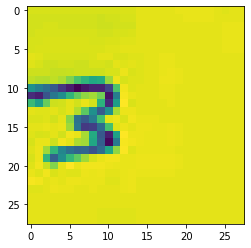

In [ ]:
import matplotlib.pyplot as plt
my_number =  X_train[60004]
plt.imshow(my_number.reshape(28,28))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [ ]:
model = Sequential()
 #CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
1876/1876 [==============================] - 31s 16ms/step - loss: 0.2870 - accuracy: 0.9147 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 2/10
1876/1876 [==============================] - 30s 16ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 3/10
1876/1876 [==============================] - 31s 16ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0439 - val_accuracy: 0.9858
Epoch 4/10
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 5/10
1876/1876 [==============================] - 32s 17ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 6/10
1876/1876 [==============================] - 30s 16ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0474 - val_accuracy: 0.9870


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141604,0.957628,0.053820,0.9821
1,0.051226,0.984121,0.040411,0.9871
2,0.032180,0.989886,0.043884,0.9858
3,0.022223,0.993035,0.036795,0.9882
4,0.015509,0.994935,0.042284,0.9867


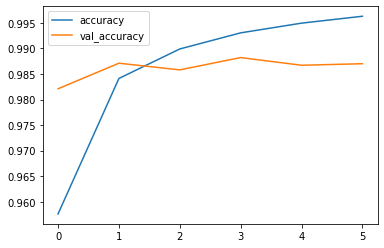

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.0473981648683548, 0.9869999885559082]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test[9999]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
predictions[9999]

6

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

7